In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , classification_report
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE



In [2]:
data = pd.read_csv("Breast_Cancer.csv")

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
print(data.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [6]:
print(data.describe())

               Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000  


In [7]:
X = data.drop("Status", axis=1)  
y = data["Status"]

X= pd.get_dummies(X) 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(X)

      Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0      68           4                      24                      1   
1      50          35                      14                      5   
2      58          63                      14                      7   
3      58          18                       2                      1   
4      47          41                       3                      1   
...   ...         ...                     ...                    ...   
4019   62           9                       1                      1   
4020   56          46                      14                      8   
4021   68          22                      11                      3   
4022   58          44                      11                      1   
4023   46          30                       7                      2   

      Survival Months  Race_Black  Race_Other  Race_White  \
0                  60       False       False        True   
1            

In [8]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("After SMOTE:", pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

After SMOTE: 0    3408
1    3408
Name: count, dtype: int64


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
# Predict on the test set
logistic_preds = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_preds))

Logistic Regression Accuracy: 0.9193548387096774


Correlation Matrix for Logistic Regression:
                    LogisticRegression  TrueLabels
LogisticRegression            1.000000    0.843491
TrueLabels                    0.843491    1.000000


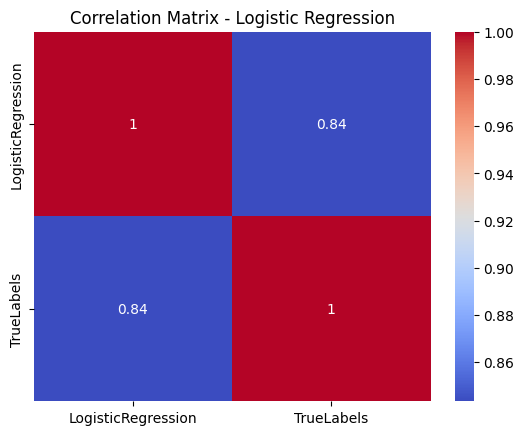

Logistic Regression - Trained Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       679
           1       0.97      0.87      0.92       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364



In [10]:
# Correlation Matrix for Logistic Regression
logreg_corr_matrix = pd.DataFrame({
    'LogisticRegression': logistic_preds,
    'TrueLabels': y_test
}).corr()
print("Correlation Matrix for Logistic Regression:")
print(logreg_corr_matrix)
sns.heatmap(logreg_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Logistic Regression")
plt.show()

logistic_preds = log_reg.predict(X_test_scaled)
print("Logistic Regression - Trained Model Classification Report:")
print(classification_report(y_test, logistic_preds))

In [11]:
# Hyperparameter tuning for Logistic Regression
best_C = 1  
best_solver = 'lbfgs'  

logreg_best = LogisticRegression(C=best_C, solver=best_solver, random_state=42)

logreg_best.fit(X_train_scaled, y_train)


logreg_preds = logreg_best.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_preds)

print("Logistic Regression - Manually Tuned Hyperparameters")
print(f"Best C: {best_C}, Best Solver: {best_solver}")
print("Accuracy:", logreg_accuracy)


Logistic Regression - Manually Tuned Hyperparameters
Best C: 1, Best Solver: lbfgs
Accuracy: 0.9193548387096774


Correlation Matrix for Logistic Regression - Tuned:
                    LogisticRegression  TrueLabels
LogisticRegression            1.000000    0.843491
TrueLabels                    0.843491    1.000000


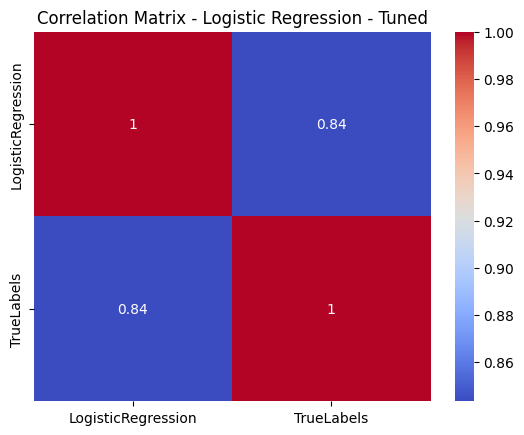

Logistic Regression - Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       679
           1       0.97      0.87      0.92       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364



In [12]:
logreg_preds = logreg_best.predict(X_test_scaled)

# Correlation Matrix for Logistic Regression
logreg_corr_matrix = pd.DataFrame({
    'LogisticRegression': logreg_preds,
    'TrueLabels': y_test
}).corr()
print("Correlation Matrix for Logistic Regression - Tuned:")
print(logreg_corr_matrix)
sns.heatmap(logreg_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Logistic Regression - Tuned")
plt.show()

# Logistic Regression - Classification Report
print("Logistic Regression - Tuned Model Classification Report:")
print(classification_report(y_test, logreg_preds))

In [13]:
# Train Naive Bayes
nb_model_weighted = GaussianNB()

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
nb_model_weighted.fit(X_train, y_train, sample_weight=sample_weights)
nb_preds_weighted = nb_model_weighted.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds_weighted))

Naive Bayes Accuracy: 0.7961876832844574


Correlation Matrix for Naive Bayes:
            NaiveBayes  TrueLabels
NaiveBayes    1.000000    0.592618
TrueLabels    0.592618    1.000000


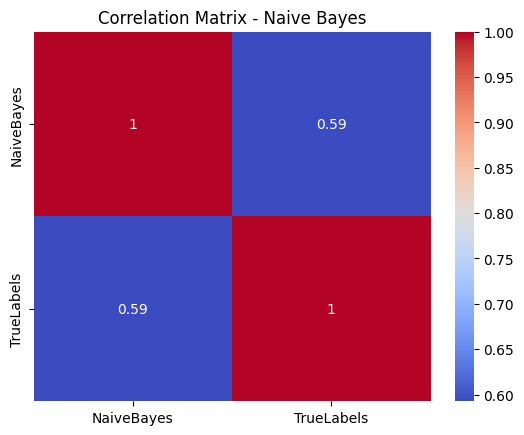

Naive Bayes - Trained Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       679
           1       0.79      0.81      0.80       685

    accuracy                           0.80      1364
   macro avg       0.80      0.80      0.80      1364
weighted avg       0.80      0.80      0.80      1364



In [14]:
nb_corr_matrix = pd.DataFrame({
    'NaiveBayes': nb_preds_weighted,
    'TrueLabels': y_test
}).corr()
print("Correlation Matrix for Naive Bayes:")
print(nb_corr_matrix)
sns.heatmap(nb_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Naive Bayes")
plt.show()

print("Naive Bayes - Trained Model Classification Report:")
print(classification_report(y_test, nb_preds_weighted))

In [15]:
# Hyperparameter tuning for Naive Bayes

best_var_smoothing = 1e-9
nb_best = GaussianNB(var_smoothing=best_var_smoothing)
nb_best.fit(X_train, y_train)
nb_preds_weighted = nb_best.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds_weighted)

print("Naive Bayes - Manually Tuned Hyperparameters")
print(f"Best var_smoothing: {best_var_smoothing}")
print("Accuracy:", nb_accuracy)



Naive Bayes - Manually Tuned Hyperparameters
Best var_smoothing: 1e-09
Accuracy: 0.7961876832844574


Correlation Matrix for Naive Bayes - Tuned:
            NaiveBayes  TrueLabels
NaiveBayes    1.000000    0.592618
TrueLabels    0.592618    1.000000


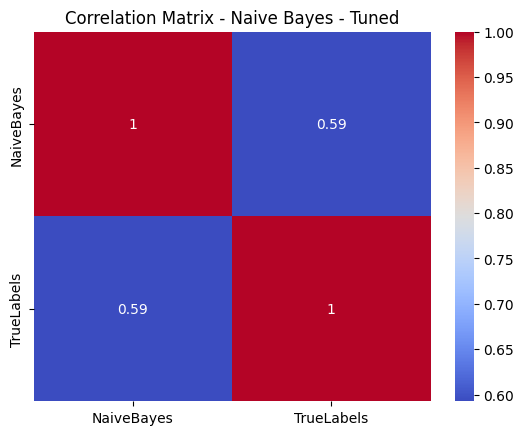

Naive Bayes - Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       679
           1       0.79      0.81      0.80       685

    accuracy                           0.80      1364
   macro avg       0.80      0.80      0.80      1364
weighted avg       0.80      0.80      0.80      1364



In [16]:
nb_preds_weighted = nb_best.predict(X_test)

# Correlation Matrix for Naive Bayes
nb_corr_matrix = pd.DataFrame({
    'NaiveBayes': nb_preds_weighted,
    'TrueLabels': y_test
}).corr()
print("Correlation Matrix for Naive Bayes - Tuned:")
print(nb_corr_matrix)
sns.heatmap(nb_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Naive Bayes - Tuned")
plt.show()

# Naive Bayes - Classification Report
print("Naive Bayes - Tuned Model Classification Report:")
print(classification_report(y_test, nb_preds_weighted ))

In [17]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9171554252199413


Correlation Matrix for SVM:
                 SVM  TrueLabels
SVM         1.000000    0.840638
TrueLabels  0.840638    1.000000


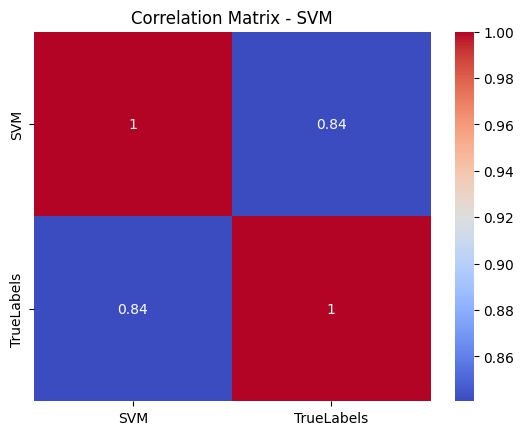

SVM - Trained Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       679
           1       0.98      0.86      0.91       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364



In [18]:
# Correlation Matrix for SVM
svm_corr_matrix = pd.DataFrame({
    'SVM': svm_preds,
    'TrueLabels': y_test
}).corr()
print("Correlation Matrix for SVM:")
print(svm_corr_matrix)
sns.heatmap(svm_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - SVM")
plt.show()

svm_preds = svm_model.predict(X_test_scaled)
print("SVM - Trained Model Classification Report:")
print(classification_report(y_test, svm_preds))


In [19]:

# Hyperparameter tuning for SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Manually chosen hyperparameters (simulating the results of hyperparameter tuning)
best_C_svm = 100  
best_kernel = 'linear' 
best_gamma = 'scale' 

# Initialize SVM with manually chosen hyperparameters
svm_best = SVC(C=best_C_svm, kernel=best_kernel, gamma=best_gamma, random_state=42)

svm_best.fit(X_train_scaled, y_train)
svm_preds = svm_best.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_preds)

print("SVM - Manually Tuned Hyperparameters")
print(f"Best C: {best_C_svm}, Best Kernel: {best_kernel}, Best Gamma: {best_gamma}")
print("Accuracy:", svm_accuracy)




SVM - Manually Tuned Hyperparameters
Best C: 100, Best Kernel: linear, Best Gamma: scale
Accuracy: 0.9178885630498533


Correlation Matrix for SVM - Tuned:
                 SVM  TrueLabels
SVM         1.000000    0.841963
TrueLabels  0.841963    1.000000


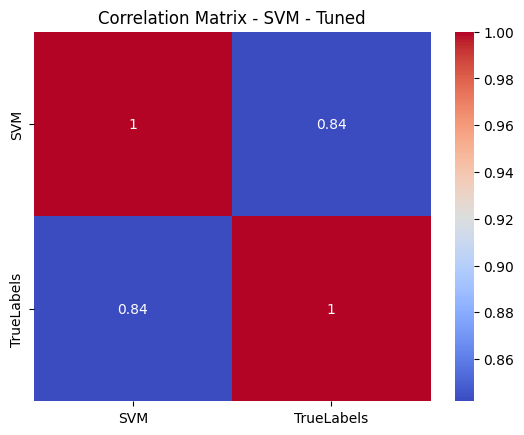

SVM - Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       679
           1       0.98      0.86      0.91       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364



In [20]:
svm_preds = svm_best.predict(X_test_scaled)

# Correlation Matrix for SVM
svm_corr_matrix = pd.DataFrame({
    'SVM': svm_preds,
    'TrueLabels': y_test
}).corr()
print("Correlation Matrix for SVM - Tuned:")
print(svm_corr_matrix)
sns.heatmap(svm_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - SVM - Tuned")
plt.show()

# SVM - Classification Report
print("SVM - Tuned Model Classification Report:")
print(classification_report(y_test, svm_preds))


In [21]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', log_reg),
    ('nb', nb_model_weighted), 
    ('svm', svm_model)
    ], voting='hard')

voting_clf.fit(X_train_scaled, y_train)
voting_preds = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, voting_preds)
print("Voting Classifier Accuracy:", voting_accuracy)


Voting Classifier Accuracy: 0.9171554252199413


Correlation Matrix for Voting Classifier:
                  VotingClassifier  TrueLabels
VotingClassifier          1.000000    0.839754
TrueLabels                0.839754    1.000000


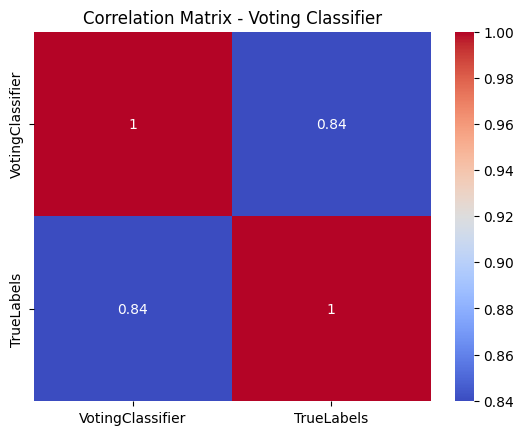

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       679
           1       0.97      0.86      0.91       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364



In [22]:
voting_corr_matrix = pd.DataFrame({
    'VotingClassifier': voting_preds,
    'TrueLabels': y_test
}).corr()

# Print the correlation matrix
print("Correlation Matrix for Voting Classifier:")
print(voting_corr_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(voting_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Voting Classifier")
plt.show()

print("Classification Report for Voting Classifier:")
print(classification_report(y_test, voting_preds))

In [23]:
# Voting Classifier tuned

voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg_best),  # Logistic Regression
    ('nb', nb_best),  # Naive Bayes
    ('svm', svm_best)  # SVM
], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate using the Voting Classifier
voting_preds = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, voting_preds)

print("Voting Classifier Accuracy:", voting_accuracy)

Voting Classifier Accuracy: 0.9171554252199413


Correlation Matrix for Voting Classifier - Tuned:
                  VotingClassifier  TrueLabels
VotingClassifier          1.000000    0.839754
TrueLabels                0.839754    1.000000


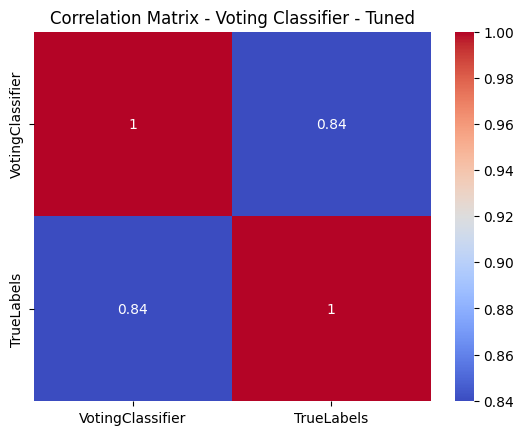

Voting Classifier - Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       679
           1       0.97      0.86      0.91       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364



In [24]:
# Correlation Matrix for Voting Classifier
voting_corr_matrix = pd.DataFrame({
    'VotingClassifier': voting_preds,
    'TrueLabels': y_test
}).corr()
print("Correlation Matrix for Voting Classifier - Tuned:")
print(voting_corr_matrix)
sns.heatmap(voting_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Voting Classifier - Tuned")
plt.show()

# Voting Classifier - Classification Report
print("Voting Classifier - Tuned Model Classification Report:")
print(classification_report(y_test, voting_preds))